# A simple K-fold approach for Quora Sincerity Prediction
### The main goal of this kernel is just a simple introduction to NLP using a couple of generic NLP functions (not detailed NLP approach)

- An existential problem for any major website today is how to handle toxic and divisive content. 
- Quora wants to tackle this problem head-on to keep their platform a place where users can feel safe sharing their knowledge with the world.

- Quora is a platform that empowers people to learn from each other. On Quora, people can ask questions and connect with others who contribute unique insights and quality answers. 
- A key challenge is to weed out insincere questions -- those founded upon false premises, or that intend to make a statement rather than look for helpful answers.

![](https://assets.entrepreneur.com/content/3x2/2000/20190211224126-quora-logo-crop.jpeg?width=700&crop=2:1)

In this competition, Kagglers developed models that identify and flag insincere questions. To date, Quora has employed both machine learning and manual review to address this problem. They developed more scalable methods to detect toxic and misleading content.

# This notebook aims only a simple introduction to word processing, it will not give a great score but if you're a complete beginner, I believe it will be helpful towards your studies.
![](https://s3-eu-west-1.amazonaws.com/beyondchocolate-cdn/beta/wp-content/uploads/2013/10/31161231/stop.png)

# importing the required libraries

In [ ]:
import os
import nltk
import numpy as np 
import pandas as pd 
print(os.listdir("../input"))
from nltk.corpus import stopwords
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import GaussianNB,MultinomialNB,ComplementNB,BernoulliNB

# a small function to see all the columns

In [ ]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

# getting the files

In [ ]:
train = pd.read_csv('../input/train.csv')
test  = pd.read_csv('../input/test.csv')

# checking the files

In [ ]:
display_all(train.head())

In [ ]:
train['target'].value_counts()

In [ ]:
train_text = train['question_text']
test_text = test['question_text']
train_target = train['target']
all_text = train_text.append(test_text)

# vectorizing

## vectorizing can be considered as a key method in word processing and text analysis, but considering the recent achievements, TfiedVectorizers are conventional but not the most powerful

-more info about TfiedVectorizer can be found here 

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

![](https://chrisalbon.com/images/machine_learning_flashcards/TF-IDF_print.png)

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(all_text)

count_vectorizer = CountVectorizer()
count_vectorizer.fit(all_text)

train_text_features_cv = count_vectorizer.transform(train_text)
test_text_features_cv = count_vectorizer.transform(test_text)

train_text_features_tf = tfidf_vectorizer.transform(train_text)
test_text_features_tf = tfidf_vectorizer.transform(test_text)

In [ ]:
train_text.head()

# 5 Fold Cross Validation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation

![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/K-fold_cross_validation_EN.svg/1280px-K-fold_cross_validation_EN.svg.png)

In [ ]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 2018)
test_preds = 0
oof_preds = np.zeros([train.shape[0],])

for i, (train_idx,valid_idx) in enumerate(kfold.split(train)):
    x_train, x_valid = train_text_features_tf[train_idx,:], train_text_features_tf[valid_idx,:]
    y_train, y_valid = train_target[train_idx], train_target[valid_idx]
    classifier = LogisticRegression()
    print('fitting.......')
    classifier.fit(x_train,y_train)
    print('predicting......')
    print('\n')
    oof_preds[valid_idx] = classifier.predict_proba(x_valid)[:,1]
    test_preds += 0.2*classifier.predict_proba(test_text_features_tf)[:,1]

In [ ]:
pred_train = (oof_preds > .25).astype(np.int)
f1_score(train_target, pred_train)

# submission

In [ ]:
submission1 = pd.DataFrame.from_dict({'qid': test['qid']})
submission1['prediction'] = (test_preds>0.25).astype(np.int)
submission1.to_csv('submission.csv', index=False)
submission1['prediction'] = (test_preds>0.25)

# Appendix

# Several NLP Libraries to help !

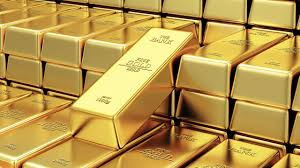

- **TextBlob** - Providing a consistent API for diving into common natural language processing (NLP) tasks. Stands on the giant shoulders of Natural Language Toolkit (NLTK) and Pattern, and plays nicely with both 
- **spaCy** - Industrial strength NLP with Python and Cython 
- **textacy** - Higher level NLP built on spaCy
- **gensim** - Python library to conduct unsupervised semantic modelling from plain text 
- **scattertext** - Python library to produce d3 visualizations of how language differs between corpora
- **GluonNLP** - A deep learning toolkit for NLP, built on MXNet/Gluon, for research prototyping and industrial deployment of state-of-the-art models on a wide range of NLP tasks.
- **AllenNLP** - An NLP research library, built on PyTorch, for developing state-of-the-art deep learning models on a wide variety of linguistic tasks.
- **PyTorch-NLP** - NLP research toolkit designed to support rapid prototyping with better data loaders, word vector loaders, neural network layer representations, common NLP metrics such as BLEU
- **Rosetta** - Text processing tools and wrappers (e.g. Vowpal Wabbit)
- **PyNLPl** - Python Natural Language Processing Library. General purpose NLP library for Python. Also contains some specific modules for parsing common NLP formats, most notably for FoLiA, but also ARPA language models, Moses phrasetables, GIZA++ alignments.
- **jPTDP** - A toolkit for joint part-of-speech (POS) tagging and dependency parsing. jPTDP provides pre-trained models for 40+ languages.
- **BigARTM** - a fast library for topic modelling
- **Snips NLU** - A production ready library for intent parsing
- **Chazutsu** - A library for downloading&parsing standard NLP research datasets
- **Word Forms** - Word forms can accurately generate all possible forms of an English word
- **Multilingual** Latent Dirichlet Allocation (LDA) - A multilingual and extensible document clustering pipeline
- **NLP Architect** - A library for exploring the state-of-the-art deep learning topologies and techniques for NLP and NLU
- **Flair** - A very simple framework for state-of-the-art multilingual NLP built on PyTorch. Includes BERT, ELMo and Flair embeddings.
- **Kashgari** - Simple, Keras-powered multilingual NLP framework, allows you to build your models in 5 minutes for named entity recognition (NER), part-of-speech tagging (PoS) and text classification tasks. Includes BERT and word2vec embedding.
- **FARM** - FARM makes cutting-edge transfer learning simple and helps you to leverage pretrained language models for your own NLP tasks.
- **Rita DSL** - a DSL, loosely based on RUTA on Apache UIMA. Allows to define language patterns (rule-based NLP) which are then translated into spaCy, or if you prefer less features and lightweight - regex patterns.









* # Great Courses from Stanford, Oxford, Carnegie Mellon, Yandex, and fast.ai


- https://github.com/oxford-cs-deepnlp-2017/lectures
- https://web.stanford.edu/class/cs224n/
- http://phontron.com/class/nn4nlp2017/
- https://github.com/yandexdataschool/nlp_course
- https://www.fast.ai/2019/07/08/fastai-nlp/ 

## Thank you very much!
## Planning to add more stuff soon